# TOTALE

### CREAZIONE DELL'OGGETTO PER SCIPY

In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd
import scvelo as scv

In [2]:
adata = sc.read("MACs_Foam.h5")

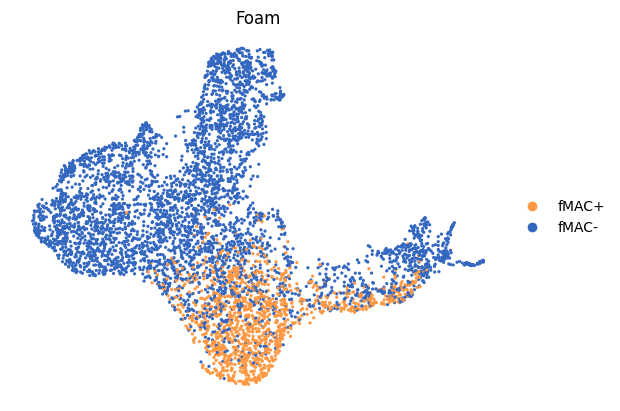

In [3]:
sc.pl.umap(adata, color=['Foam'], frameon=False, palette=["#FF9843","#3468C0","#86A7FC","#FFDD95"])

In [4]:
adata = adata[adata.obs['Sample'].isin(["hfd"])]

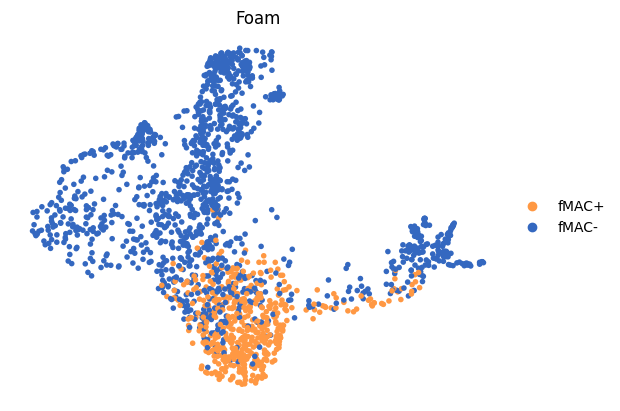

In [6]:
sc.pl.umap(adata, color=['Foam'], frameon=False)

### VELOCITY with scVELO

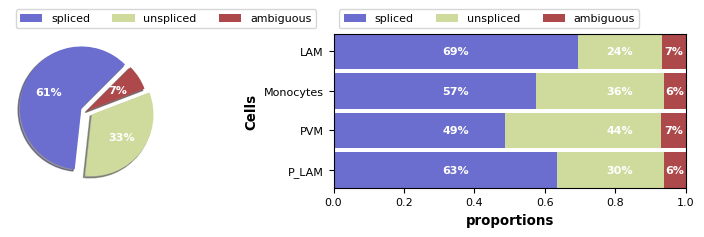

In [6]:
scv.pl.proportions(adata, groupby='Cells')

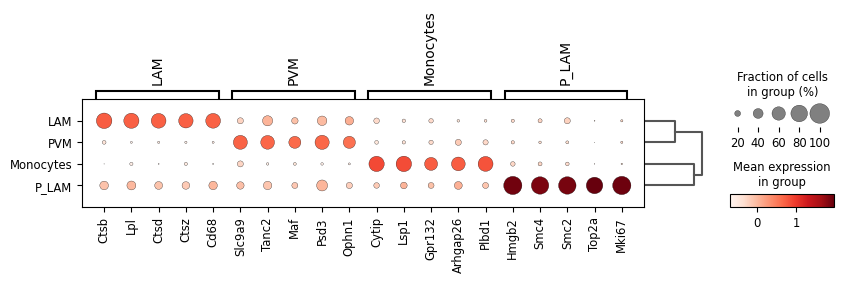

In [7]:
sc.pp.scale(adata, max_value=10)
sc.tl.rank_genes_groups(adata,'Cells', use_raw=False)
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, groupby='Cells', use_raw=False, 
                                dendrogram=True)

In [7]:
scv.tl.recover_dynamics(adata, n_jobs=16)

recovering dynamics (using 16/16 cores)


  0%|          | 0/32245 [00:00<?, ?gene/s]

Gm14339 not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


Gpat3 not recoverable due to insufficient samples.


Gm28730 not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


4933406C10Rik not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.
A530016L24Rik not recoverable due to insufficient samples.


2610028H24Rik not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


not recoverable due to insufficient samples.


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [9]:
scv.tl.velocity(adata, mode="dynamical") #separately as a oneliner, not in the 'cell'...
scv.tl.velocity_graph(adata) #separately... and the note in the next line the basis as 'umap' and not 'X_umap'

computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/16 cores)


  0%|          | 0/1856 [00:00<?, ?cells/s]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 4) + inhomogeneous part.

not recoverable due to insufficient samples.


In [ ]:
scv.pl.velocity_embedding_stream(adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=1,
                                color="Foam", save="velocity_FoamHFD.png", figsize=(8,6), size=1000, legend_loc='right')

figure cannot be saved as pdf, using png instead (can only output finite numbers in pdf).
saving figure to file ./figures/scvelo_velocity_HFD.png_o.png


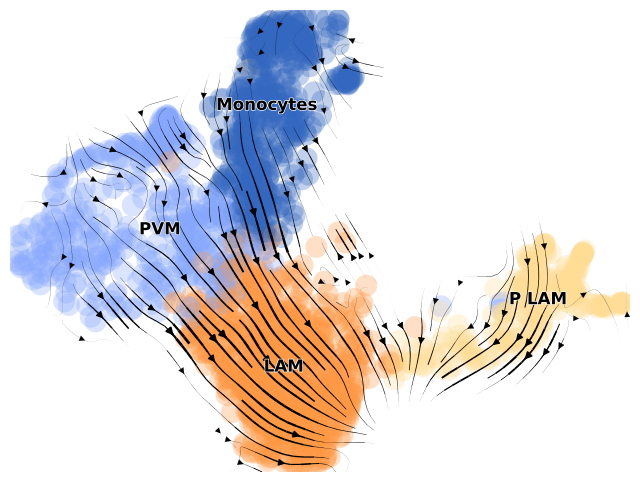

In [11]:
scv.pl.velocity_embedding_stream(adata, basis="umap", legend_fontsize=12, title="", smooth=0.8, min_mass=1,
                                color="Cells", save="velocity_HFD.png_o", figsize=(8,6), size=1000)

In [12]:
#from scipy.stats.stats import rankdata
scv.tl.rank_velocity_genes(adata, groupby='Cells', n_genes=500)
df = scv.core.get_df(adata.uns['rank_velocity_genes']['names'])

df.to_excel("Velocity_Gene_HFD.xlsx", index=False)

df.head()

ranking velocity genes


/home/andrea/anaconda3/envs/scvelo/lib/python3.9/site-packages/scvelo/tools/utils.py:463: DeprecationWarning: Please use `rankdata` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import rankdata


    finished (0:00:06) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,LAM,Monocytes,PVM,P_LAM
0,Cd74,Psmb8,Emp3,Clspn
1,Lamtor4,Havcr2,Ifi207,Hspb1
2,Apoe,Rnase6,Ctsb,Plpp1
3,Actb,Fmnl1,Lamp1,Pdlim1
4,Nedd8,Slc6a8,C3ar1,Fundc2


--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
saving figure to file ./figures/scvelo_conf_HFD.png


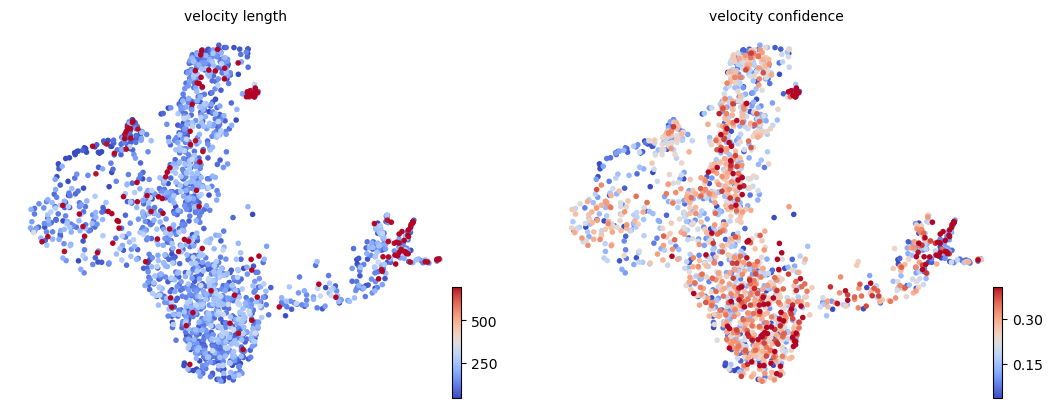


not recoverable due to insufficient samples.
skipping bimodality check for Brf2: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data..
D530033B14Rik not recoverable due to insufficient samples.
not recoverable due to insufficient samples.
not recoverable due to insufficient samples.
not recoverable due to insufficient samples.
skipping bimodality check for A530013C23Rik: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_

In [13]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95], save="conf_HFD.png")

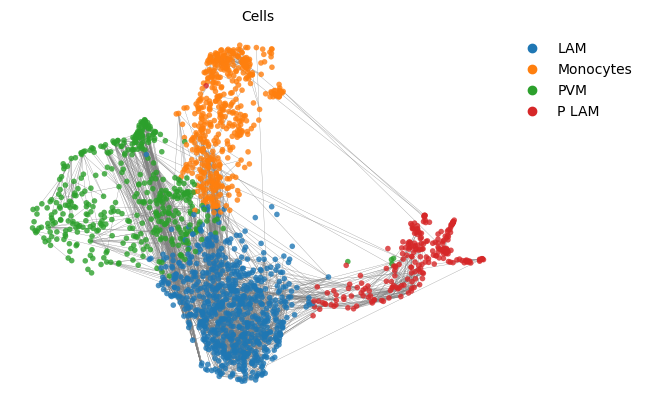

In [13]:
scv.pl.velocity_graph(adata, threshold=.3, color='Cells')

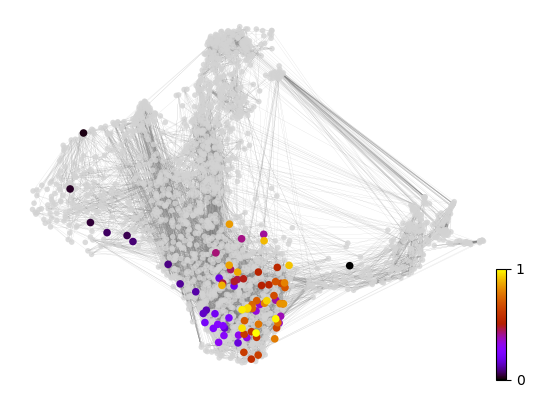

In [14]:
x, y = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=70)
ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False)
ax = scv.pl.scatter(adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax)

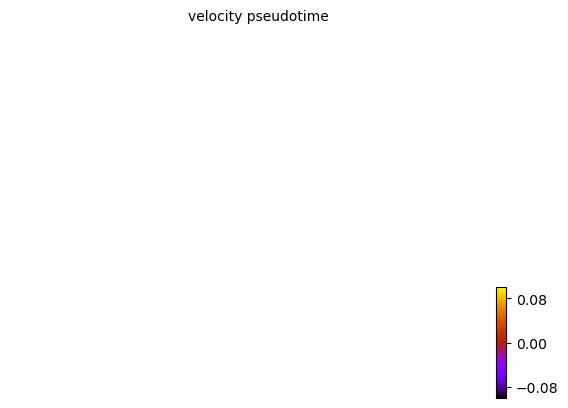

In [15]:
#scv.tl.velocity_pseudotime(adata)
scv.tl.velocity_pseudotime(adata, root_key="Monocytes")
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [16]:
# this is needed due to a current bug - bugfix is coming soon.
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

scv.tl.paga(adata, groups='Cells')
#df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T

running PAGA using priors: ['velocity_pseudotime']


TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

In [ ]:
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5, 
            save="paga_HFD.png")

not recoverable due to insufficient samples.
skipping bimodality check for Brf2: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data..
D530033B14Rik not recoverable due to insufficient samples.


computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


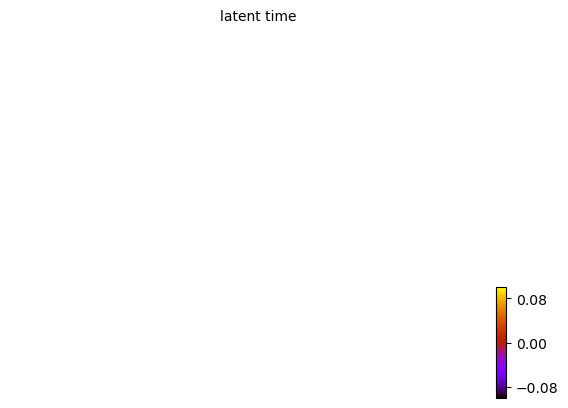

not recoverable due to insufficient samples.
not recoverable due to insufficient samples.


In [17]:
scv.tl.latent_time(adata, root_key="Monocytes")
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

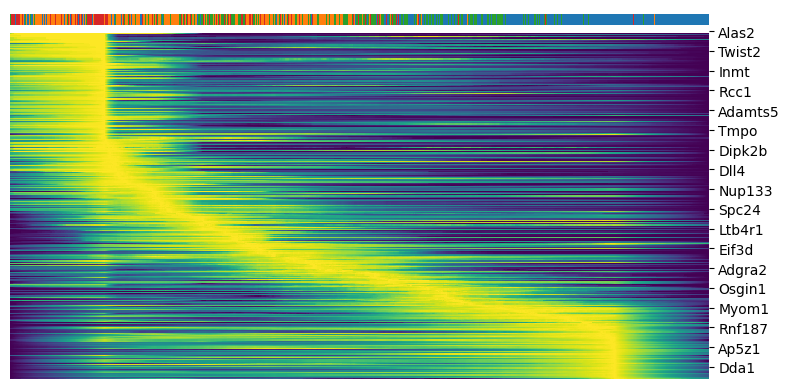

not recoverable due to insufficient samples.
not recoverable due to insufficient samples.
skipping bimodality check for A530013C23Rik: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data..
Ptcra not recoverable due to insufficient samples.
not recoverable due to insufficient samples.
not recoverable due to insufficient samples.
skipping bimodality check for Prdm4: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` wit

In [18]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='velocity_pseudotime', col_color='Cells',
               n_convolve=500)

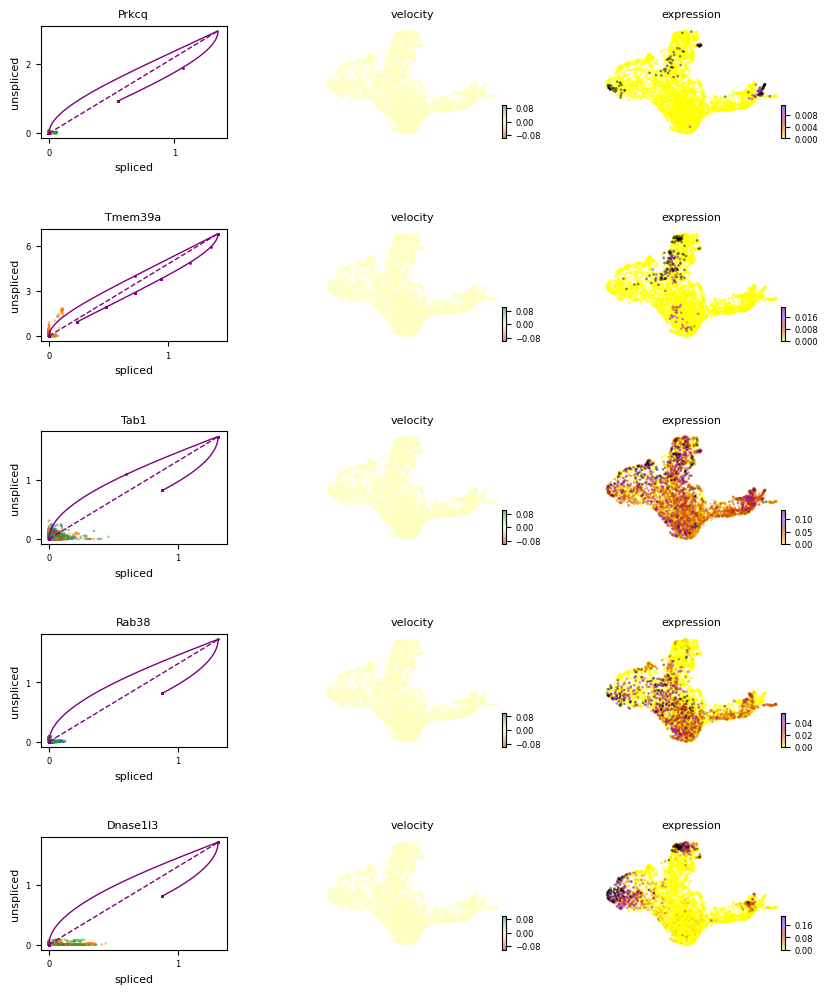

In [32]:
scv.pl.velocity(adata, top_genes[0:5], ncols=1, color='Cells')

In [19]:
scv.tl.score_genes_cell_cycle(adata)

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


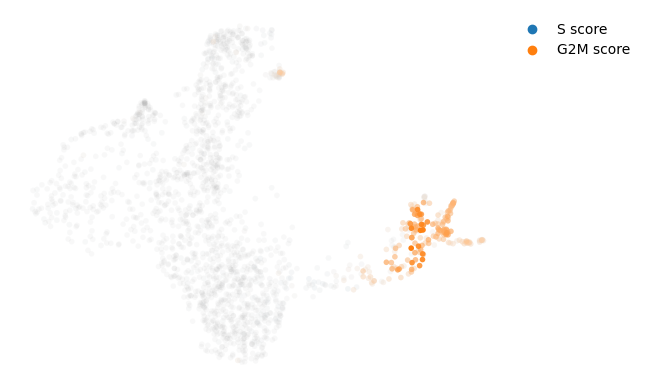

In [20]:
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])